Import Library


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

Membaca Dataset

In [5]:
file_path = "../data/dataset_laba_rugi_10th.csv"  # Sesuaikan dengan lokasi file

df = pd.read_csv(file_path)
print("\n📌 Informasi Dataset:\n")
df.info()
print("\n📌 5 Data Teratas:\n", df.head())


📌 Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User_ID            60000 non-null  int64 
 1   Bidang_Usaha       60000 non-null  object
 2   Tahun              60000 non-null  int64 
 3   Bulan              60000 non-null  int64 
 4   Pendapatan         60000 non-null  int64 
 5   Beban_Operasional  60000 non-null  int64 
 6   Pajak              60000 non-null  int64 
 7   Laba_Rugi          60000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 3.7+ MB

📌 5 Data Teratas:
    User_ID Bidang_Usaha  Tahun  Bulan  Pendapatan  Beban_Operasional  \
0        1  Perdagangan   2015      1   249900595          270975502   
1        1  Perdagangan   2015      2   465968276          153224038   
2        1  Perdagangan   2015      3   183120466          269467210   
3        1  Perdagangan   2015      4   4

Cek Missing Value & Duplikasi

In [10]:
def check_missing_duplicates(df):
    print("\n📌 Missing Values per Kolom:\n", df.isnull().sum())
    print("\n📌 Jumlah Duplikasi:", df.duplicated().sum())

check_missing_duplicates(df)


📌 Missing Values per Kolom:
 User_ID              0
Bidang_Usaha         0
Tahun                0
Bulan                0
Pendapatan           0
Beban_Operasional    0
Pajak                0
Laba_Rugi            0
dtype: int64

📌 Jumlah Duplikasi: 0


Eksplorasi Data (Distribusi & Statistik Deskriptif)


📌 Statistik Deskriptif:
             User_ID         Tahun         Bulan    Pendapatan  \
count  60000.000000  60000.000000  60000.000000  6.000000e+04   
mean     250.500000   2019.500000      6.500000  2.754895e+08   
std      144.338481      2.872305      3.452081  1.296603e+08   
min        1.000000   2015.000000      1.000000  5.000102e+07   
25%      125.750000   2017.000000      3.750000  1.632454e+08   
50%      250.500000   2019.500000      6.500000  2.765697e+08   
75%      375.250000   2022.000000      9.250000  3.872794e+08   
max      500.000000   2024.000000     12.000000  4.999671e+08   

       Beban_Operasional         Pajak     Laba_Rugi  
count       6.000000e+04  6.000000e+04  6.000000e+04  
mean        1.601583e+08  2.757456e+07  8.775658e+07  
std         8.075694e+07  1.300861e+07  1.534821e+08  
min         2.000362e+07  5.000218e+06 -2.975961e+08  
25%         9.042411e+07  1.629851e+07 -2.590086e+07  
50%         1.600488e+08  2.765749e+07  8.735934e+07  
75%

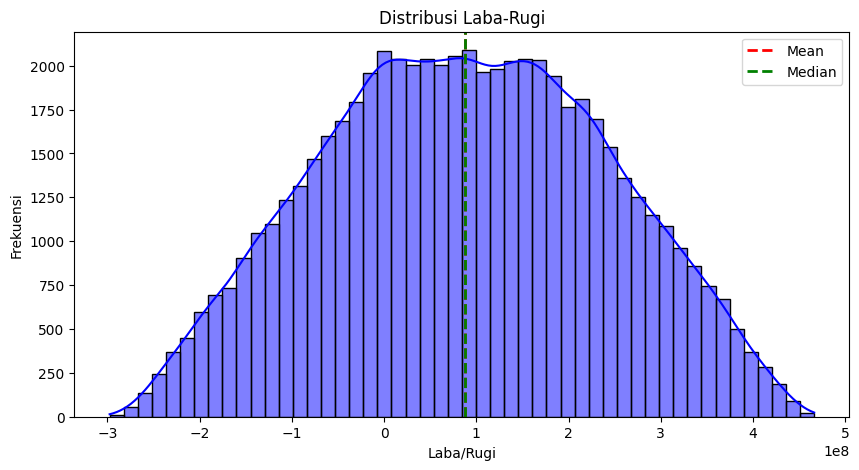

In [11]:
def explore_data(df):
    print("\n📌 Statistik Deskriptif:\n", df.describe())
    plt.figure(figsize=(10, 5))
    sns.histplot(df["Laba_Rugi"], bins=50, kde=True, color="blue")
    plt.axvline(df["Laba_Rugi"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
    plt.axvline(df["Laba_Rugi"].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
    plt.title("Distribusi Laba-Rugi")
    plt.xlabel("Laba/Rugi")
    plt.ylabel("Frekuensi")
    plt.legend()
    plt.show()
    
explore_data(df)

Deteksi Outlier


📌 Outlier berdasarkan IQR: 0 data
📌 Outlier berdasarkan Z-Score: 0 data


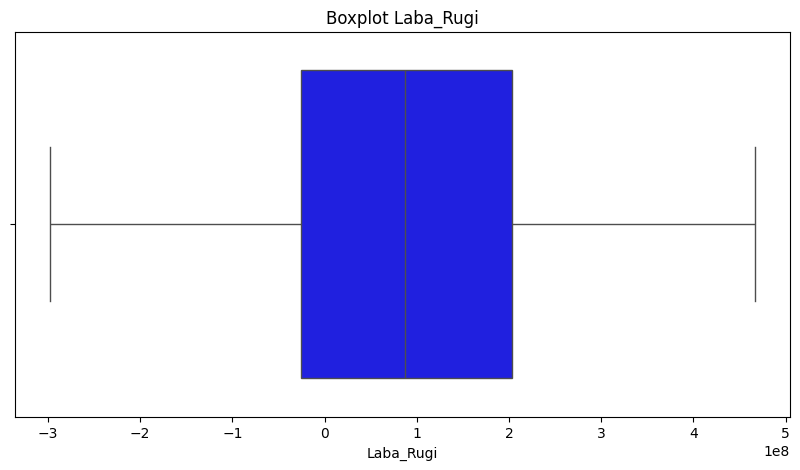

In [12]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    df['Z_Score'] = zscore(df[column])
    outliers_z = df[(df['Z_Score'] < -3) | (df['Z_Score'] > 3)]
    
    print(f"\n📌 Outlier berdasarkan IQR: {len(outliers_iqr)} data")
    print(f"📌 Outlier berdasarkan Z-Score: {len(outliers_z)} data")
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column], color="blue")
    plt.title(f"Boxplot {column}")
    plt.show()

detect_outliers(df, "Laba_Rugi")

Feature

In [16]:
def add_features(df):
    df["Rasio_Laba_Pendapatan"] = np.where(df["Pendapatan"] != 0, df["Laba_Rugi"] / df["Pendapatan"], 0)
    print("\n📌 Fitur Baru Ditambahkan: Rasio_Laba_Pendapatan\n")
    print(df[["Laba_Rugi", "Pendapatan", "Rasio_Laba_Pendapatan"].head()])
    
    add_features(df)

Normalisasi Data

In [17]:
def normalize_data(df, columns):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    print("\n📌 Data Dinormalisasi (Min-Max Scaling)\n")
    print(df.head())
    
normalize_data(df, ["Pendapatan", "Beban_Operasional", "Pajak", "Laba_Rugi", "Rasio_Laba_Pendapatan"])



📌 Data Dinormalisasi (Min-Max Scaling)

   User_ID Bidang_Usaha  Tahun  Bulan  Pendapatan  Beban_Operasional  \
0        1  Perdagangan   2015      1    0.444255           0.896341   
1        1  Perdagangan   2015      2    0.924441           0.475794   
2        1  Perdagangan   2015      3    0.295843           0.890954   
3        1  Perdagangan   2015      4    0.799004           0.274053   
4        1  Perdagangan   2015      5    0.247106           0.315741   

      Pajak  Laba_Rugi   Z_Score  Rasio_Laba_Pendapatan  
0  0.468484   0.327829 -0.879024               0.834641  
1  0.795312   0.745552  1.200142               0.947460  
2  0.584487   0.235554 -1.338312               0.768357  
3  0.472215   0.764642  1.295159               0.964412  
4  0.910210   0.398487 -0.527333               0.868387  
